In [65]:
# Step 1: Import the function
from urllib.request import urlretrieve

# Step 2: Define the URL and download the CSV file
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'medical.csv')  # This saves the file as 'medical.csv' locally

# Step 3: Install pandas if not already installed (the ! runs a shell command)
!pip install pandas --quiet

# Step 4: Import pandas and read the CSV into a dataframe
import pandas as pd
medical_df = pd.read_csv('medical.csv')

# Step 5: Display the dataframe
medical_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
!pip install plotly matplotlib seaborn --quiet

In [67]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [69]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [70]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [71]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [72]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green', 'grey', 'yellow', 'blue'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [73]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [74]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [75]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [76]:
px.histogram(medical_df, x='smoker', color='region', title='Smoker')

In [77]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [78]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [79]:
import plotly.express as px

fig = px.violin(medical_df, 
                 x='smoker', 
                 y='charges', 
                 color='smoker', 
                 box=True, 
                 points='all', 
                 title='charges vs. smoker status')
fig.show()

/tmp/ipykernel_7287/3875255737.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




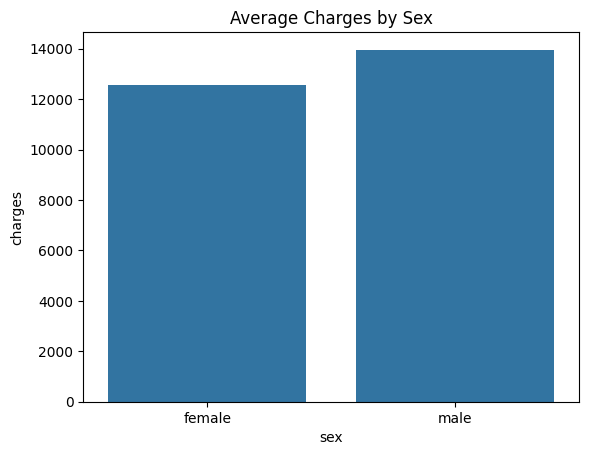

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='sex', y='charges', data=medical_df, estimator='mean', ci=None)
plt.title('Average Charges by Sex')
plt.show()


In [81]:
fig = px.bar(medical_df.groupby('children')['charges'].mean().reset_index(),
             x='children',
             y='charges',
             title='Average Charges by Number of Children')
fig.show()


In [82]:
fig = px.violin(medical_df,
                x='region',
                y='charges',
                color='region',
                box=True,
                title='Charges Distribution Across Regions')
fig.show()


In [83]:
fig = px.box(medical_df,
             x='region',
             y='charges',
             color='smoker',
             title='Charges by Region and Smoking Status')
fig.show()


In [84]:
fig = px.violin(
    medical_df,
    x='age',
    y='charges',
    color='region',
    title='Age vs. Charges colored by BMI',
)
fig.show()

In [85]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [86]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [87]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [88]:
medical_df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [89]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [90]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [91]:
px.scatter(medical_df, x= 'age', y='age')

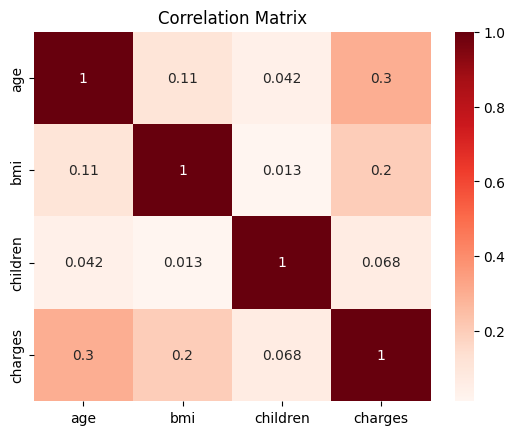

In [92]:
sns.heatmap(
    medical_df.corr(numeric_only=True), 
    cmap='Reds',
    annot=True)
plt.title('Correlation Matrix');

In [93]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

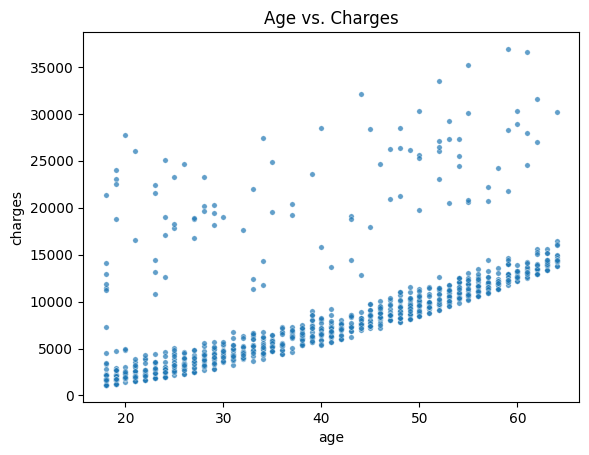

In [94]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [95]:
def estimate_charges(age, w, b):
    return w * age + b

In [96]:
w = 50
b = 100

In [97]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [98]:

ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [99]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

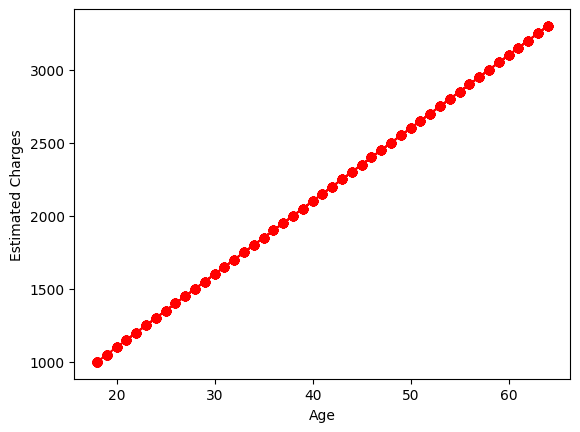

In [100]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

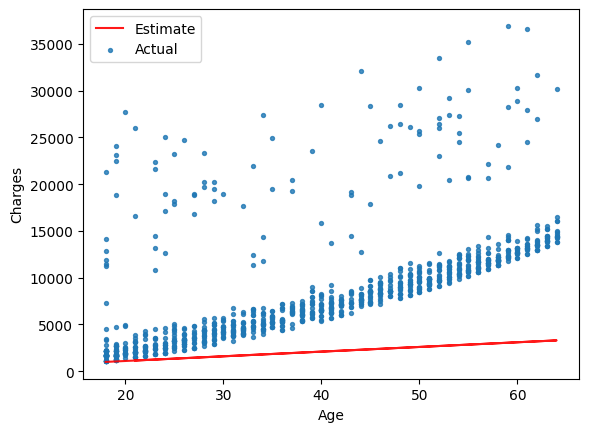

In [101]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [102]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

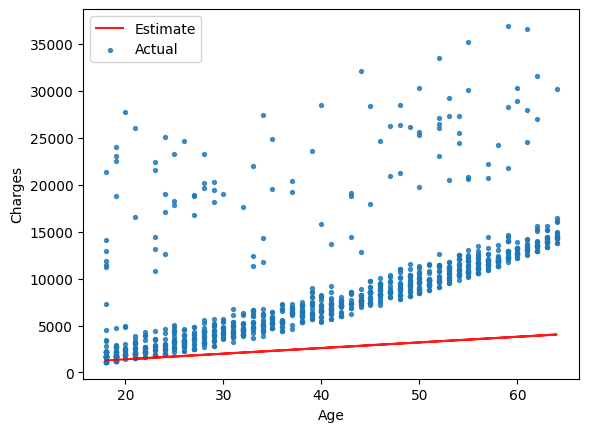

In [103]:
try_parameters(60, 200)

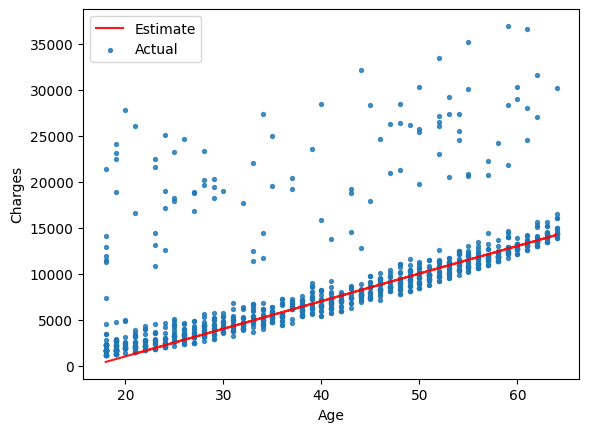

In [104]:
try_parameters(300, -5000)

In [105]:
!pip install numpy --quiet

import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

w = 50
b = 100

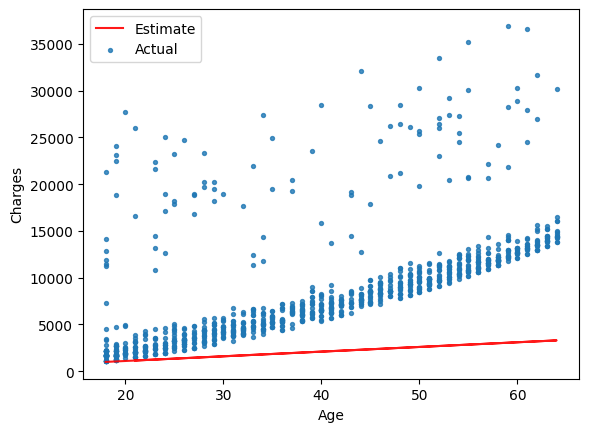

In [106]:
try_parameters(w, b)

In [107]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [108]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [145]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4818.589201659388


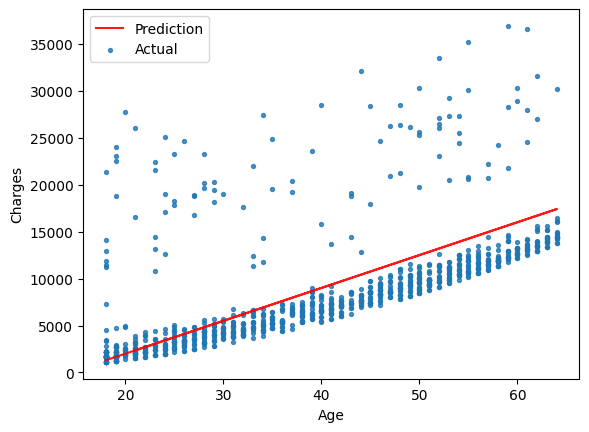

In [146]:
try_parameters(350, -5000)

In [111]:
!pip install scikit-learn --quiet

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
model = LinearRegression()

In [114]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [115]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [116]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [155]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

/home/stanley-otieno/ML/jovian/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [118]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [119]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [120]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [122]:
# w
model.coef_

array([267.24891283])

In [123]:
# b
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss:  4662.505766636395


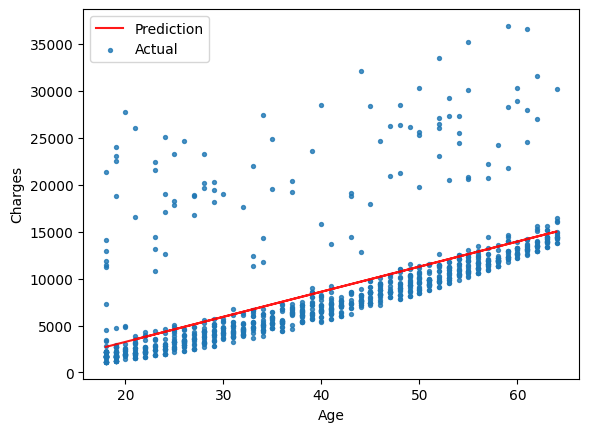

In [124]:
try_parameters(model.coef_, model.intercept_)

In [128]:
from sklearn.linear_model import SGDRegressor


In [129]:
# initialize default parameters
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

In [130]:
sgd_model.fit(inputs, targets)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [131]:
inputs = non_smoker_df[['age']]

In [132]:
targets = non_smoker_df['charges']

RMSE Loss:  4950.755108149788


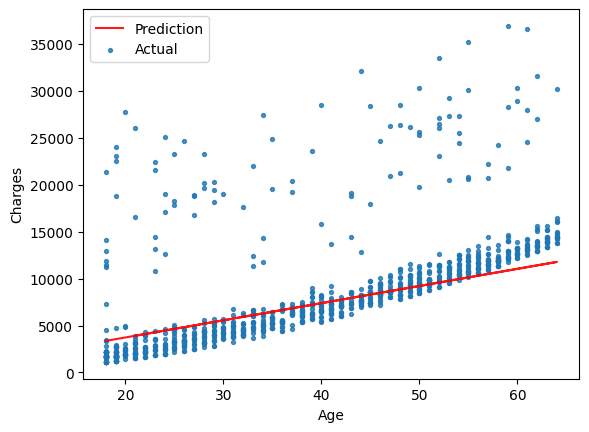

In [133]:
try_parameters(sgd_model.coef_, sgd_model.intercept_)

In [134]:
smoker_df = medical_df[medical_df.smoker == 'yes']

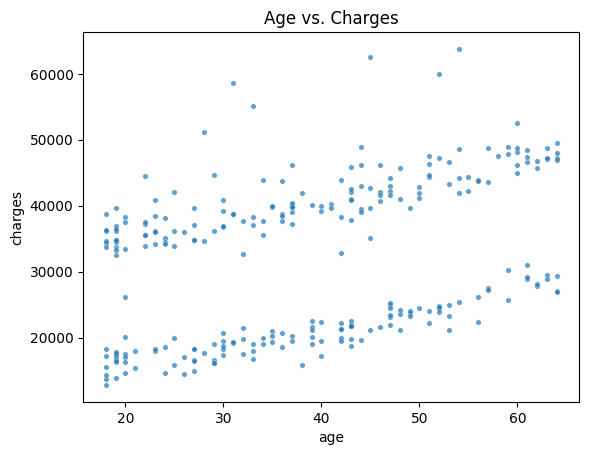

In [135]:
plt.title('Age vs. Charges')
sns.scatterplot(data=smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [136]:
ages = smoker_df.age
ages

0       19
11      62
14      27
19      30
23      34
        ..
1313    19
1314    30
1321    62
1323    42
1337    61
Name: age, Length: 274, dtype: int64

In [137]:
ages = smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

0       1050
11      3200
14      1450
19      1600
23      1800
        ... 
1313    1050
1314    1600
1321    3200
1323    2200
1337    3150
Name: age, Length: 274, dtype: int64

In [142]:
def try_smoker_parameters(w, b):
    ages = smoker_df.age
    target = smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  12508.234243771329


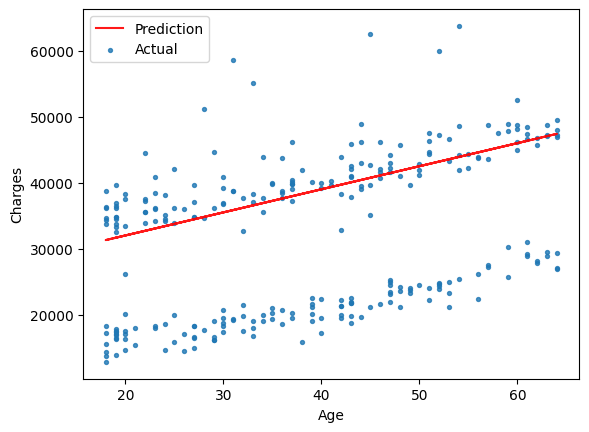

In [152]:
try_smoker_parameters(350, 25000)

In [154]:
smoker_inputs = smoker_df[['age']]
smoker_targets = smoker_df.charges
print('smoker.inputs.shape :', inputs.shape)
print('smoker.targes.shape :', targets.shape)

smoker.inputs.shape : (1064, 1)
smoker.targes.shape : (1064,)


In [162]:
!pip install scikit-learn --quiet

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
new_model = LinearRegression()

In [166]:
new_model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [167]:
help(new_model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [171]:
new_model.predict(np.array([[26], 
                        [30], 
                        [59]]))

/home/stanley-otieno/ML/jovian/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4857.05117705,  5926.04682837, 13676.26530048])

In [173]:
new_predictions = new_model.predict(smoker_inputs)
new_predictions

array([ 2986.30878723, 14478.01203897,  5124.30008988,  5926.04682837,
        6995.0424797 ,  6193.2957412 ,  3788.05552572,  5391.54900271,
        7262.29139253, 13943.51421331,  7529.54030536, 10736.52725933,
        7529.54030536, 13409.01638764,  2719.0598744 , 12072.77182349,
        3253.55770006,  5391.54900271,  5124.30008988,  3788.05552572,
        7796.78921819,  9934.78052084, 13141.76747481, 13676.26530048,
       15012.50986463, 12874.51856198,  8064.03813102, 14210.76312614,
        3253.55770006, 14745.2609518 ,  5658.79791554,  9667.53160801,
        2986.30878723,  6460.54465403,  6995.0424797 ,  5926.04682837,
       10202.02943367,  9133.03378235, 10736.52725933,  2719.0598744 ,
        5926.04682837,  9133.03378235,  2719.0598744 , 14745.2609518 ,
        7529.54030536,  5124.30008988,  7262.29139253,  2986.30878723,
        9133.03378235,  8598.53595668,  2986.30878723,  4055.30443855,
       14745.2609518 ,  2719.0598744 , 14745.2609518 , 12340.02073632,
      

RMSE Loss:  4662.505766636395


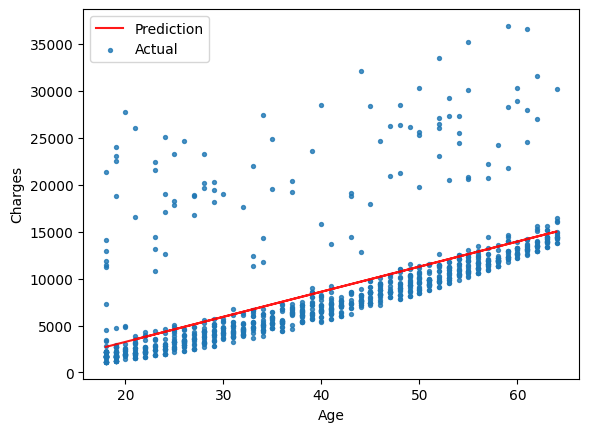

In [176]:
try_parameters(new_model.coef_, new_model.intercept_)